In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("HousingData_Clean.csv", index_col=0)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [10]:
X = df.drop(columns=["MEDV"]) #Girdi matrisi
y = df["MEDV"] # Çıktı vectoru

In [ ]:
!pip install scikit-learn

In [11]:
# 500 veri -> 400 ü ile kendini eğit 100 ü ile kendini test et

from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [27]:
# [Tahminler] 
# [Gerçek Cevaplar]
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.776796292821953

In [ ]:
# Her tahminde ortalam (+-) 2.77 sapma var. 30 -> 27.3 - 32.77

In [29]:
mse =  mean_squared_error(y_test, y_pred)
mse

13.016181076408452

In [30]:
r2 = r2_score(y_test, y_pred)
r2

0.8253168657507561

In [32]:
df.shape

(506, 14)

In [33]:
# karar ağacı görselleştirme
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

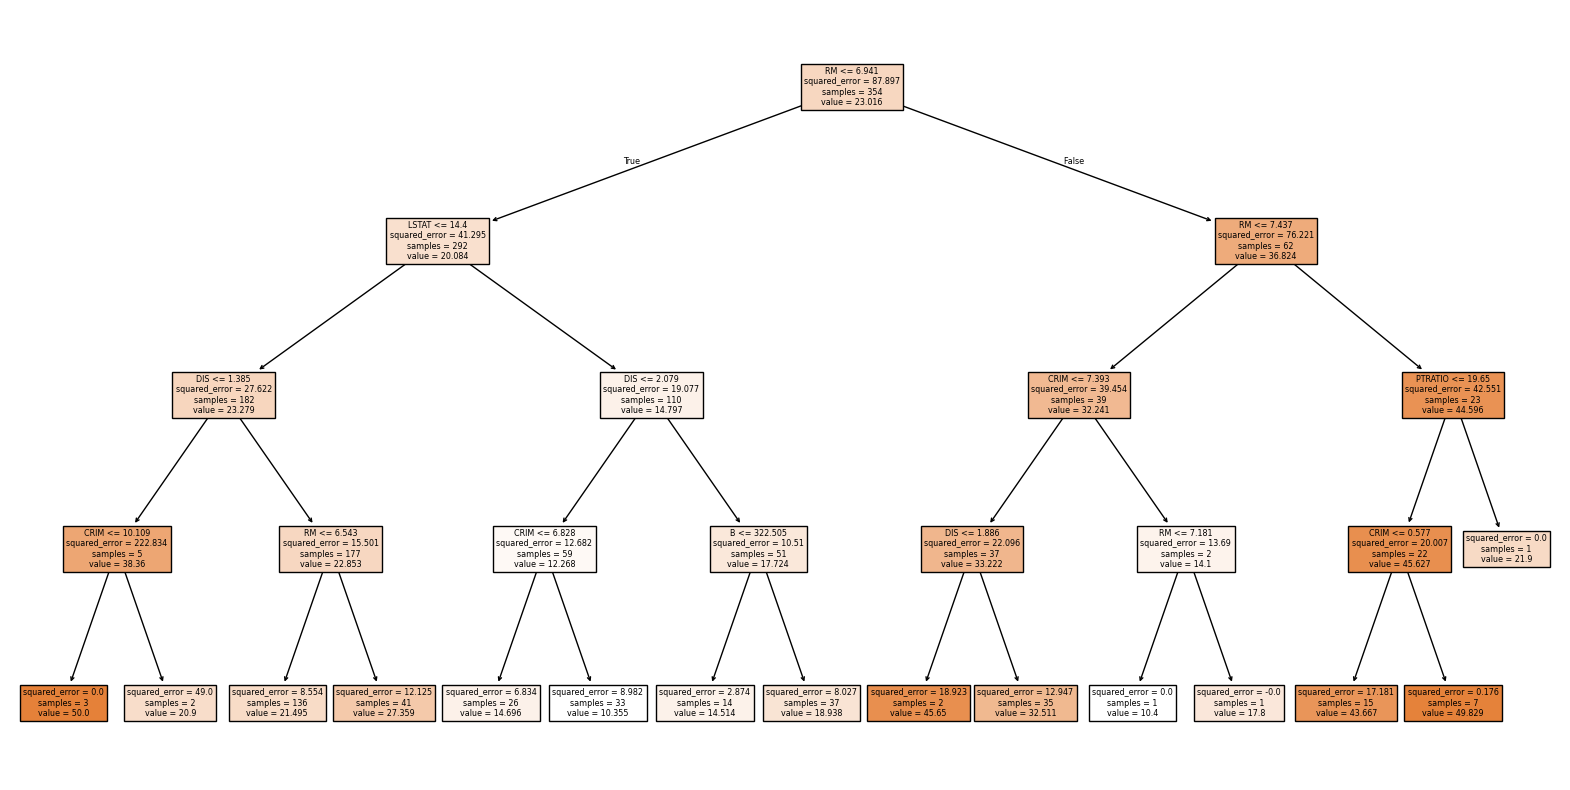

In [38]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
!pip install seaborn

In [40]:
import seaborn as sb

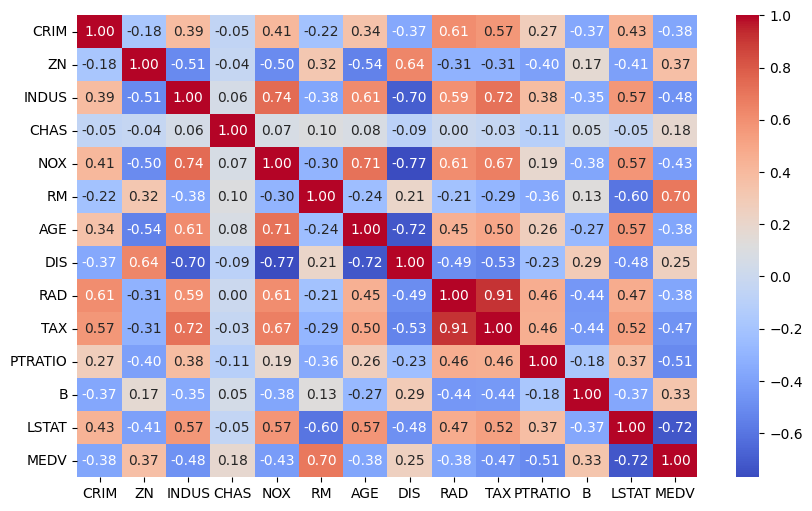

In [47]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
model2 = RandomForestRegressor(n_estimators=11, max_depth=4, random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=11, random_state=42)

In [51]:
y_pred2 = model2.predict(X_test)

In [52]:
mae2 = mean_absolute_error(y_test,y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

mae2,mse2,r2_2

(2.613283008123686, 15.182379430216919, 0.7962454879305249)

In [53]:
# CV -> Cross Validation
# GridSearchCV

param_grid = {
"n_estimators": list(range(5,25)),
    "max_depth": list(range(4,14))
}

In [54]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV( RandomForestRegressor(), param_grid, scoring="r2" )
grid.fit(X_train,y_train)